#### 1. Pra Proses

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('./datapenumpang.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,08.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
702,703,0,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,144.542,NaN,C
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,77.417,NaN,Q
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,78.542,NaN,S
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26,NaN,S


In [3]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare            object
Cabin           object
Embarked        object
dtype: object


In [4]:
data['Fare'] = pd.to_numeric(data['Fare'], errors='coerce')
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,707.000000,707.000000,707.000000,707,707,562.000000,707.000000,707.000000,707,688.000000,159,706
unique,NaN,NaN,NaN,707,2,NaN,NaN,NaN,563,NaN,121,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,CA 2144,NaN,G6,S
freq,NaN,NaN,NaN,1,453,NaN,NaN,NaN,6,NaN,4,506
mean,354.000000,0.387553,2.308345,NaN,NaN,30.034253,0.530410,0.383310,NaN,92.505605,NaN,NaN
std,204.237607,0.487537,0.835458,NaN,NaN,14.626759,1.067214,0.815157,NaN,161.526268,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.750000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,177.500000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,10.500000,NaN,NaN
50%,354.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,27.750000,NaN,NaN
75%,530.500000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,78.958000,NaN,NaN


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            145
SibSp            0
Parch            0
Ticket           0
Fare            19
Cabin          548
Embarked         1
dtype: int64

<Axes: >

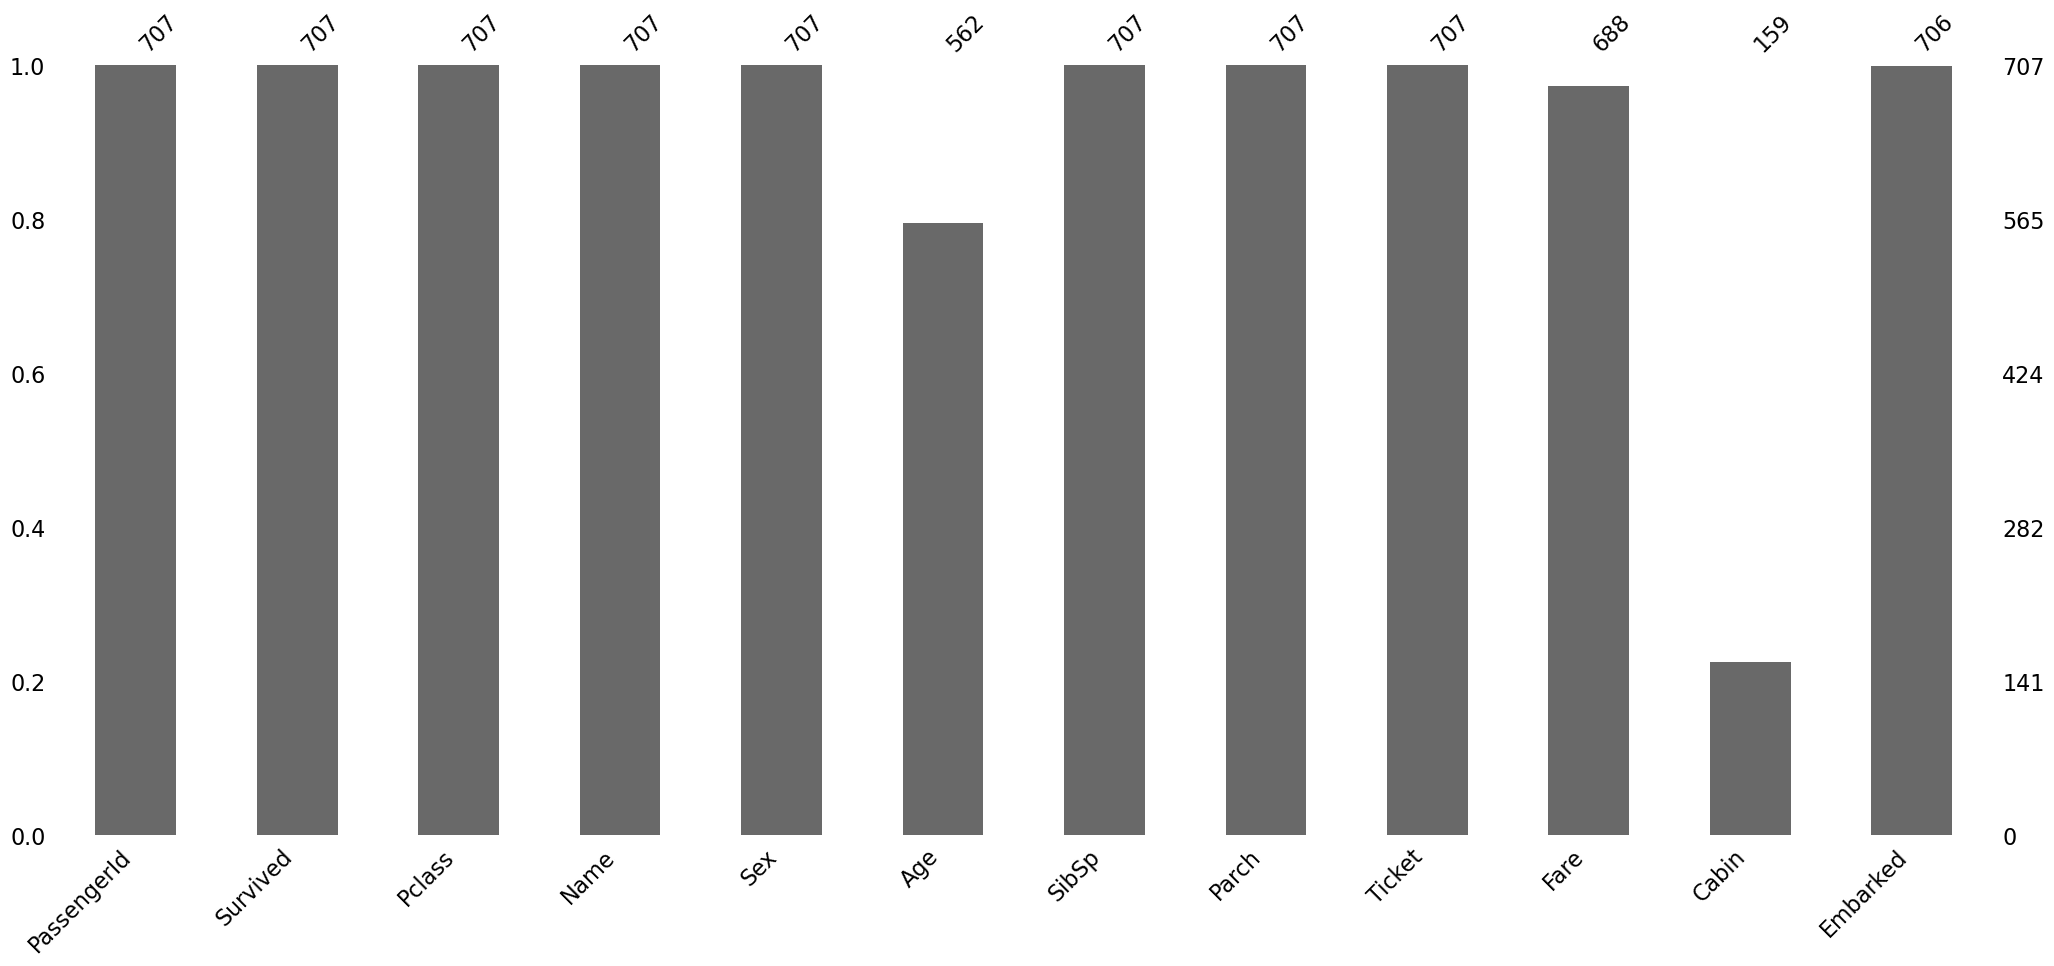

In [7]:
msno.bar(data)

In [8]:
data = data.drop(['Cabin'], axis=1)


In [9]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,S
...,...,...,...,...,...,...,...,...,...,...,...
702,703,0,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,144.542,C
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,77.417,Q
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,78.542,S
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,S


<Axes: >

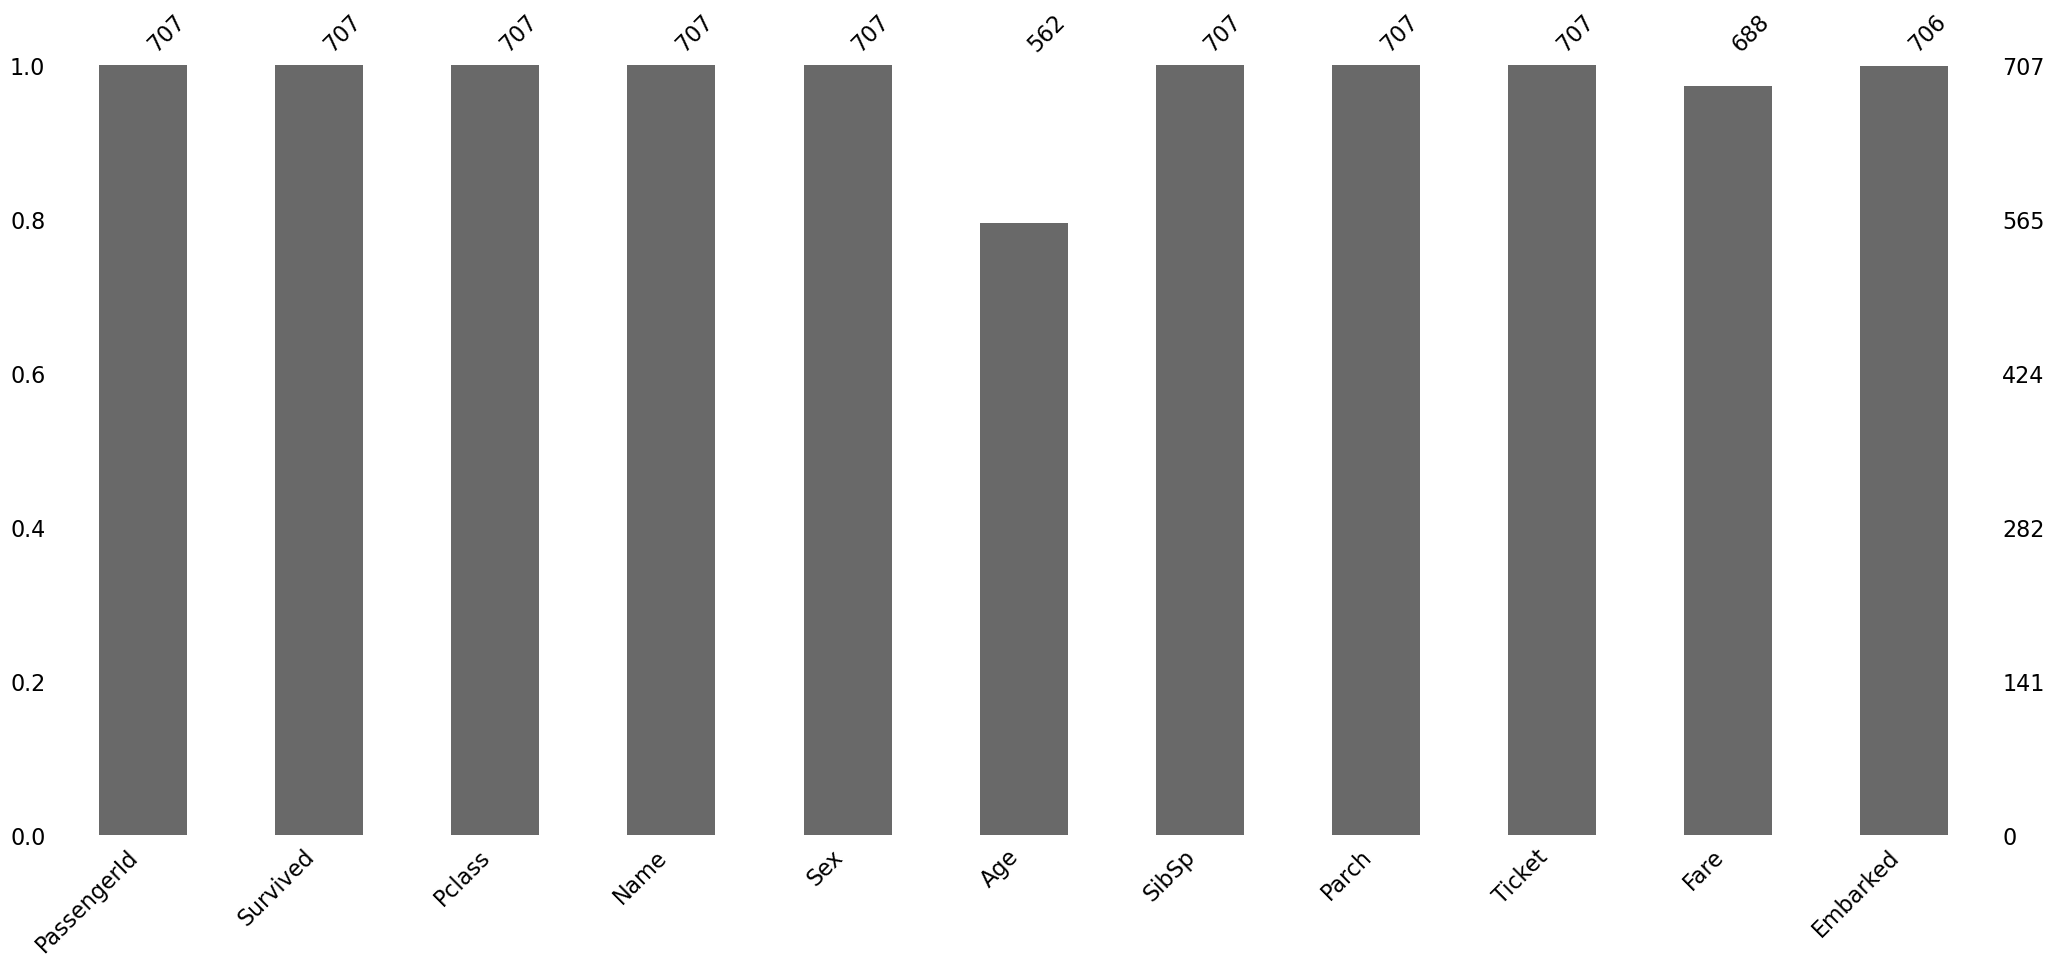

In [10]:
msno.bar(data)

In [11]:
# Age
data['Age'] = SimpleImputer(strategy='mean').fit_transform(data[['Age']])


In [12]:
# Fare
data['Fare'] = SimpleImputer(strategy='mean').fit_transform(data[['Fare']])


In [13]:
# Embarked
imp_mean_embarked = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data.iloc[:,10:11] = imp_mean_embarked.fit_transform(data.iloc[:,10:11])

In [14]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [117]:
le_sex = LabelEncoder()
data['Sex'] = le_sex.fit_transform(data['Sex'])

le_embarked = LabelEncoder()        
data['Embarked'] = le_embarked.fit_transform(data['Embarked'])

In [16]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.250,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,712.833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.925,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.100,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.050,2
...,...,...,...,...,...,...,...,...,...,...,...
702,703,0,3,"Barbara, Miss. Saiide",0,18.0,0,1,2691,144.542,0
703,704,0,3,"Gallagher, Mr. Martin",1,25.0,0,0,36864,77.417,1
704,705,0,3,"Hansen, Mr. Henrik Juul",1,26.0,1,0,350025,78.542,2
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",1,39.0,0,0,250655,26.000,2


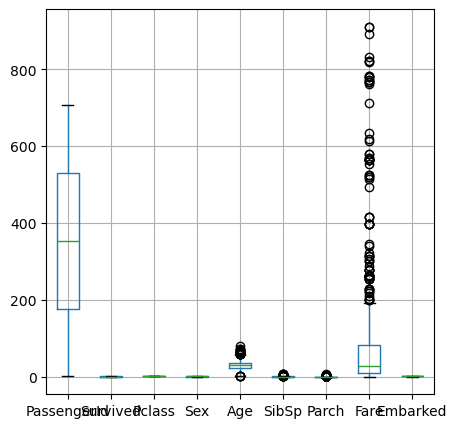

In [17]:
plt.figure(figsize=(5,5))
data.boxplot()
plt.show()

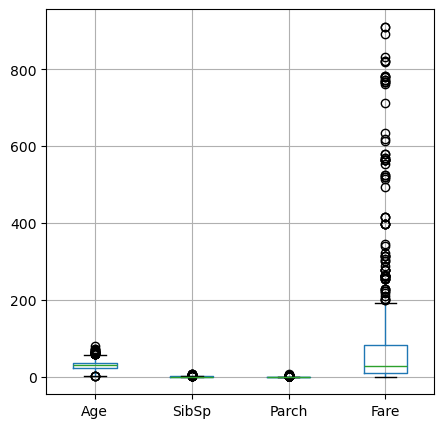

In [18]:
plt.figure(figsize=(5,5))
data.boxplot(column=['Age', 'SibSp', 'Parch', 'Fare'])
plt.show()

In [19]:
Q1_Age = data['Age'].quantile(0.25)
Q3_Age = data['Age'].quantile(0.75)
IQR_Age = Q3_Age - Q1_Age
lower_limit_Age = Q1_Age - 1.5 * IQR_Age
upper_limit_Age = Q3_Age + 1.5 * IQR_Age

In [20]:
data['Age'] = np.where(data['Age'] > upper_limit_Age, upper_limit_Age, np.where(data['Age'] < lower_limit_Age, lower_limit_Age, data['Age']))

In [21]:
Q1_sibsp = data['SibSp'].quantile(0.25)
Q3_sibsp = data['SibSp'].quantile(0.75)
IQR_sibsp = Q3_sibsp - Q1_sibsp
upper_limit_sibsp = Q3_sibsp + 1.5 * IQR_sibsp

In [22]:
data['SibSp'] = np.where(data['SibSp'] > upper_limit_sibsp, upper_limit_sibsp, data['SibSp'])


In [23]:
Q1_parch = data['Parch'].quantile(0.25)
Q3_parch = data['Parch'].quantile(0.75)
IQR_parch = Q3_parch - Q1_parch
upper_limit_parch = Q3_parch + 1.5 * IQR_parch

In [24]:
data['Parch'] = np.where(data['Parch'] > upper_limit_parch, upper_limit_parch, data['Parch'])


In [25]:
Q1_fare = data['Fare'].quantile(0.25)
Q3_fare = data['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
upper_limit_fare = Q3_fare + 1.5 * IQR_fare

In [26]:
data['Fare'] = np.where(data['Fare'] > upper_limit_fare, upper_limit_fare, data['Fare'])


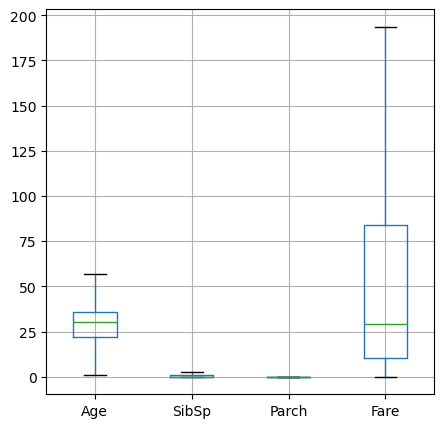

In [27]:
plt.figure(figsize=(5,5))
data.boxplot(column=['Age', 'SibSp', 'Parch', 'Fare'])
plt.show()

In [28]:
scaler = StandardScaler()
data[['Age', 'Fare', 'SibSp', 'Parch']] = scaler.fit_transform(data[['Age', 'Fare', 'SibSp', 'Parch']])


In [29]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.628747,0.776458,0.0,A/5 21171,-0.861231,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.665246,0.776458,0.0,PC 17599,2.145195,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.305249,-0.615065,0.0,STON/O2. 3101282,-0.850344,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.422622,0.776458,0.0,113803,-0.121706,2
4,5,0,3,"Allen, Mr. William Henry",1,0.422622,-0.615065,0.0,373450,-0.848328,2
...,...,...,...,...,...,...,...,...,...,...,...
702,703,0,3,"Barbara, Miss. Saiide",0,-0.952246,-0.615065,0.0,2691,1.353182,0
703,704,0,3,"Gallagher, Mr. Martin",1,-0.386124,-0.615065,0.0,36864,0.270508,1
704,705,0,3,"Hansen, Mr. Henrik Juul",1,-0.305249,0.776458,0.0,350025,0.288653,2
705,706,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",1,0.746121,-0.615065,0.0,250655,-0.558808,2


In [30]:
data.shape

(707, 11)

In [31]:
output_path = 'datapenumpang_clean.csv'
data.to_csv(output_path, index=False)

#### 2. Modelling

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [33]:
# data understanding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  707 non-null    int64  
 1   Survived     707 non-null    int64  
 2   Pclass       707 non-null    int64  
 3   Name         707 non-null    object 
 4   Sex          707 non-null    int32  
 5   Age          707 non-null    float64
 6   SibSp        707 non-null    float64
 7   Parch        707 non-null    float64
 8   Ticket       707 non-null    object 
 9   Fare         707 non-null    float64
 10  Embarked     707 non-null    int32  
dtypes: float64(4), int32(2), int64(3), object(2)
memory usage: 55.4+ KB


In [34]:
data.Survived.value_counts()

Survived
0    433
1    274
Name: count, dtype: int64

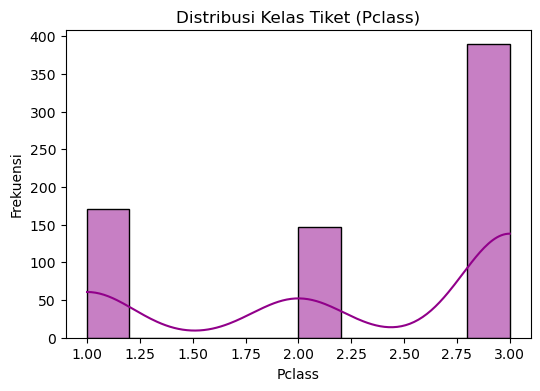

In [35]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='Pclass', bins=10, kde=True, color='#91008a')

plt.title('Distribusi Kelas Tiket (Pclass)')
plt.xlabel('Pclass')
plt.ylabel('Frekuensi')
plt.show()

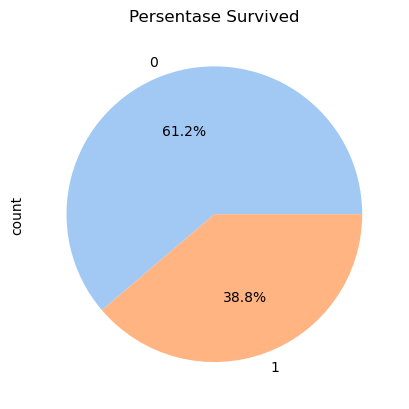

In [36]:
sns.set_palette('pastel')
data['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Persentase Survived')
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_10408\2089978962.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Survived', palette='rocket')


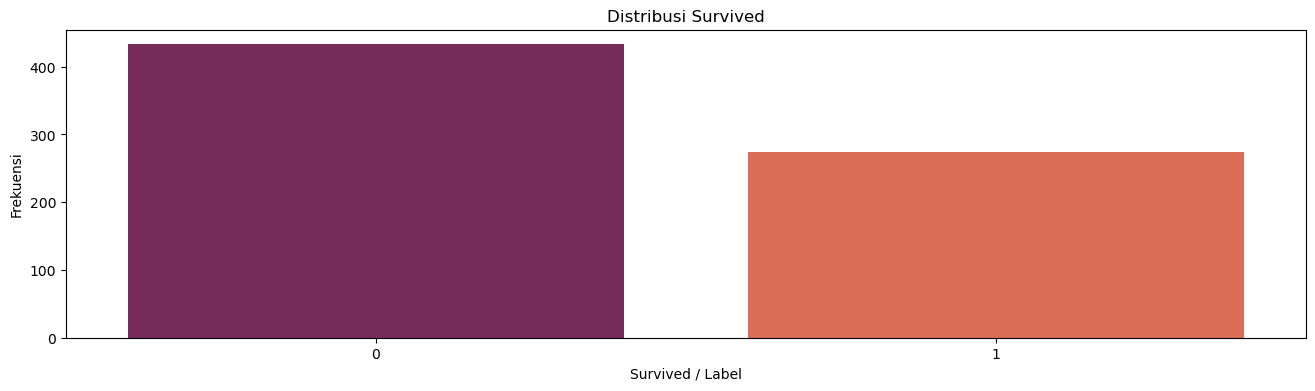

In [37]:
plt.figure(figsize=(16,4))
sns.countplot(data=data, x='Survived', palette='rocket')

plt.title('Distribusi Survived')
plt.xlabel('Survived / Label')
plt.ylabel('Frekuensi')
plt.show()

In [38]:
# Select numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numerical_cols.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             PassengerId  Survived    Pclass       Age     SibSp  Parch  \
PassengerId     1.000000  0.010669 -0.061934  0.098757 -0.067212    NaN   
Survived        0.010669  1.000000 -0.314664 -0.076097  0.023794    NaN   
Pclass         -0.061934 -0.314664  1.000000 -0.334837  0.033340    NaN   
Age             0.098757 -0.076097 -0.334837  1.000000 -0.274164    NaN   
SibSp          -0.067212  0.023794  0.033340 -0.274164  1.000000    NaN   
Parch                NaN       NaN       NaN       NaN       NaN    NaN   
Fare            0.007124  0.171925 -0.314927 -0.009990  0.215689    NaN   

                 Fare  
PassengerId  0.007124  
Survived     0.171925  
Pclass      -0.314927  
Age         -0.009990  
SibSp        0.215689  
Parch             NaN  
Fare         1.000000  


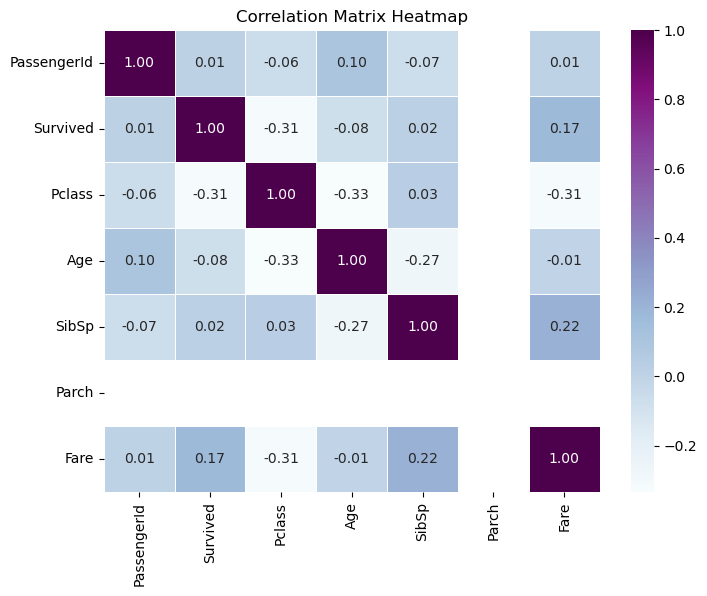

In [39]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

In [98]:
# Preparation Data
x = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y = data['Survived']

print("x : ", x.shape)
print("y : ", y.shape)
x

x :  (707, 7)
y :  (707,)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.628747,0.776458,0.0,-0.861231,2
1,1,0,0.665246,0.776458,0.0,2.145195,0
2,3,0,-0.305249,-0.615065,0.0,-0.850344,2
3,1,0,0.422622,0.776458,0.0,-0.121706,2
4,3,1,0.422622,-0.615065,0.0,-0.848328,2
...,...,...,...,...,...,...,...
702,3,0,-0.952246,-0.615065,0.0,1.353182,0
703,3,1,-0.386124,-0.615065,0.0,0.270508,1
704,3,1,-0.305249,0.776458,0.0,0.288653,2
705,2,1,0.746121,-0.615065,0.0,-0.558808,2


In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=40)

Modelling & Evaluation

In [109]:
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100))
print(y_pred)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        46
           1       0.77      0.80      0.78        25

    accuracy                           0.85        71
   macro avg       0.83      0.83      0.83        71
weighted avg       0.85      0.85      0.85        71

Akurasi SVM : 84.51%
[0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1
 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


Testing

In [127]:
new_data = {'Pclass': [3],
            'Sex': [0],
            'Age': [20],
            'SibSp': [0],
            'Parch': [0],
            'Fare': [28.4],
            'Embarked': [2]
            }

new_data = pd.DataFrame(new_data)
new_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,20,0,0,28.4,2


In [128]:
# new_data = le.transform(new_data)

new_data['Sex'] = le_sex.transform(new_data['Sex'])
new_data['Embarked'] = le_embarked.transform(new_data['Embarked'])

y_pred_new = clf.predict(new_data)

if y_pred_new == 0:
    print("No Survived")
elif y_pred_new == 1:
    print("Survived")
else:
    print("Tidak Terdefinisi")

print("Klasifikasi Data Baru : ", y_pred_new)

Survived
Klasifikasi Data Baru :  [1]


Model

In [130]:
import joblib

# Simpan model
joblib.dump(clf, 'model_svm_penumpang.pkl')

['model_svm_penumpang.pkl']

Confusion Matrix

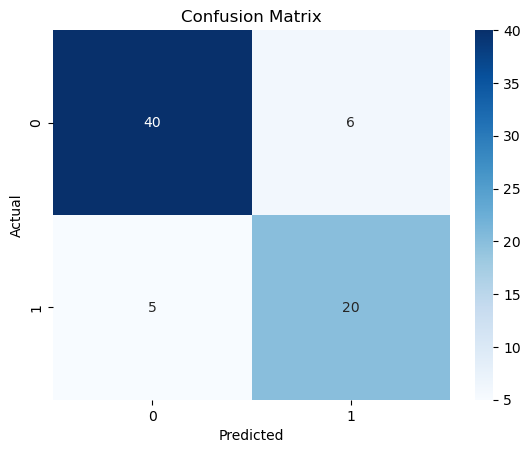

In [129]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()